In [ ]:
"""
< 분류 >
 - 종속변수의 데이터 형태가 범주형 데이터일 때 분류를 실시
 - 종속변수의 데이터 범주가 성별분류와 같이 2개중 1개를 선택할 때 : 이진분류
 -                                          3개이상 중 1개를 선택 : 다중분류
 - 분류는 확률 데이터를 이용합니다.
 - 확률 : 0~1 사이의 값으로 표현됨
 - 2개 또는 3개 이상의 분류시 확률이 가장 높은 종속변수가 결정됨
"""
# "확률기반" 이라는게 중요해요.

In [1]:
### 데이터 읽어 들이기
# - 데이터프레임 변수명 : fish
# - 사용데이터 : data/05_생선_분류_데이터셋.csv
import pandas as pd  

file_path = "./data/05_생선_분류_데이터셋.csv"
fish =  pd.read_csv(file_path)

fish

### Species  Weight  Length  Diagonal  Height  Width
#    종류     무게    길이    대각선    높이    두께
# - 종속변수 : 종류 (범주형)
# - 독립변수 : 나머지 모두

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


# 전처리

### 독립변수와 종속변수 추출하기

In [12]:
### 독립변수 데이터 추출하기
# - 변수명 : fish_input
# - 훈련에 사용하는 array배열 타입으로 최종 결과 넣기
# - 데이터 행렬 차원 확인하기
fish_input = fish[["Weight", "Length", "Diagonal", "Height", "Width"]].to_numpy()
fish_input.shape

(159, 5)

In [15]:
### 종속변수 데이터 추출하기
# - 변수명 : fish_target
fish_target = fish["Species"].to_numpy()
fish_target.shape

(159,)

### 훈련 및 테스트 데이터로 분리하기

In [17]:
### 분리비율 75:25 (디폴트로 생략가능)
# - 랜덤값 : 42
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = \
              train_test_split(fish_input, fish_target,  
                               test_size=0.25, random_state=42)

In [18]:
train_input.shape, test_input.shape, train_target.shape, test_target.shape

((119, 5), (40, 5), (119,), (40,))

### 정규화(표준화)

In [19]:
### 독립변수 정규화하기
# - 독립변수 변수명 : train_scaled, test_scaled

In [20]:
### 사용 패키지 (전처리 라이브러리 : preprocessing)
from sklearn.preprocessing import StandardScaler

In [21]:
### 클래스(객체) 생성
ss = StandardScaler()
ss

StandardScaler()

In [22]:
### 표준화를 위한 점수를 생성하기 위한 패턴 찾기
ss.fit(train_input)

StandardScaler()

In [23]:
### 찾은 패턴으로 데이터 변환하기
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [24]:
train_scaled.shape, test_scaled.shape

((119, 5), (40, 5))

### 훈련모델 적용하기 - KNN 적용하기

In [25]:
### KNN 분류 패키지 
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
### 이웃의 갯수 3개 사용
# - 훈련 및 테스트 정확도 확인하기

In [27]:
### 클래스(모델) 생성하기
kn = KNeighborsClassifier(n_neighbors=3)
kn

KNeighborsClassifier(n_neighbors=3)

In [28]:
### 훈련 시키기
kn.fit(train_scaled, train_target)

KNeighborsClassifier(n_neighbors=3)

In [29]:
### 정확도 확인하기 : 훈련 및 테스트
train_scroe = kn.score(train_scaled, train_target)
test_scroe = kn.score(test_scaled, test_target)

In [30]:
train_scroe, test_scroe

(0.8907563025210085, 0.85)

In [31]:
### 종속변수에 생선 종류가 몇가지 있는지 확인하기
fish["Species"].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [32]:
### KNN이 사용한 종속변수의 순서 확인하기
# - 훈련모델들은 종속변수의 범주값을 오름차순으로 관리합니다.
kn.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [40]:
### 예측하기
# - test_scaled 데이터 이용
# - test_scaled 데이터의 상위 5개만 사용해서 확인해 보겠습니다.
test_scaled[:5]

array([[-0.88741352, -0.91804565, -1.03098914, -0.90464451, -0.80762518],
       [-1.06924656, -1.50842035, -1.54345461, -1.58849582, -1.93803151],
       [-0.54401367,  0.35641402,  0.30663259, -0.8135697 , -0.65388895],
       [-0.34698097, -0.23396068, -0.22320459, -0.11905019, -0.12233464],
       [-0.68475132, -0.51509149, -0.58801052, -0.8998784 , -0.50124996]])

In [44]:
kn.predict(test_scaled[ : 5])

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype=object)

In [45]:
test_target[ : 5]

array(['Perch', 'Smelt', 'Pike', 'Whitefish', 'Perch'], dtype=object)

In [46]:
### 예측결과와 실제결과값을 비교할 수 있도록 출력하기
import numpy as np
np.column_stack((test_target[ : 5], kn.predict(test_scaled[ : 5])))

array([['Perch', 'Perch'],
       ['Smelt', 'Smelt'],
       ['Pike', 'Pike'],
       ['Whitefish', 'Perch'],
       ['Perch', 'Perch']], dtype=object)

In [47]:
### 예측결과 확률값 확인하기
proba = kn.predict_proba(test_scaled[ : 5])
np.round(proba, decimals=4)

# ['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish']

array([[0.    , 0.    , 1.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 1.    , 0.    ],
       [0.    , 0.    , 0.    , 1.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ]])

### 로지스틱 회귀(Logistic Regression)

In [ ]:
"""
< 로지스틱 회귀 모델 >
 - 이름은 회귀이지만, 분류에서도 주로 사용됩니다.
 - 보통 분류모델로 많이 사용됨
 - 선형회귀와 동일한 선형방정식이 사용됨
 
< 로지스틱 회귀 모델이 분류하는 방법 >
 - 종속변수 데이터의 범주의 갯수에 따라서 이진분류와 다중분류를 
   알아서 결정하고, 분류를 위한 분류함수를 적용함
 - 이진분류 : 시그모이드 함수가 적용됨 (0~1 사이의 값을 만들어내는 함수)
 - 다중분류 : 소프트맥스 함수가 적용됨 (0~n 사이의 값을 만들어내는 함수)
"""

##### 시그모이드 형태 시각화

In [48]:
import matplotlib.pylab as plt

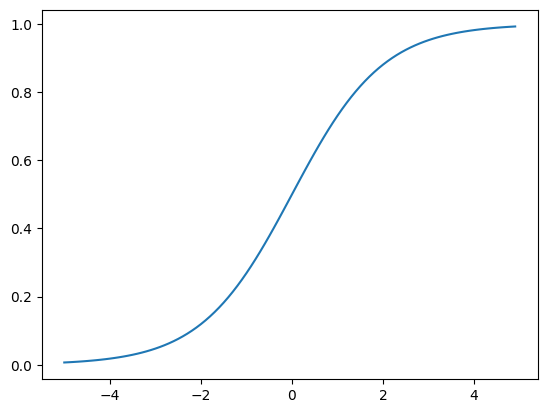

In [53]:
### 임의값 생성하기
# - -5 ~ 5 까지 0.1 씩 증가하는 100개의 값 생성하기
z = np.arange(-5, 5, 0.1)
z.shape

### 시그모이드로 계산하기
#  - exp() : 지수로 변환하는 함수
phi = 1 / (1 + np.exp(-z))
phi

plt.plot(z, phi)
plt.show()

### 시그모이드가 값을 결정하는 방법
# - x축이 0 일때 - y축은 0.5
# - y축을 기준으로 0.5보다 크면 결정

In [55]:
### 사용하는 데이터 차원 확인
train_scaled.shape, train_target.shape

### 종속변수에는 7개의 범주가 있음 -> 이진분류를 위해서는 2개로 만들어내야함

((119, 5), (119,))

### 이진분류 

In [64]:
### 이진분류를 위해서는 종속변수의 범주는 2개
# - train_target 데이터에서 2개만 추출하기
# - 추출 범주명 : Bream, Smelt 두개 추출하여 사용
# - 훈련에 사용할 종속변수명 : target_bream_smelt
# - 훈련에 사용할 독립변수명 : train_bream_smelt
# >> Bream 와 Smelt 이 있는 위치의 독립변수와 종속변수 데이터를 추출해야함

### Bream 와 Smelt 이 있는 위치를 찾기 위한 필터링하기
indexes = (train_target == "Bream") | (train_target == "Smelt") 
indexes

### 훈련에 사용할 독립변수 추출하기
train_bream_smelt = train_scaled[indexes == True]    # train_scaled[indexes] 와 동일, True 는 디폴트이기 때문에
train_bream_smelt

### 훈련에 사용할 종속변수 추출하기
target_bream_smelt = train_target[indexes == True]
target_bream_smelt

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Bream', 'Smelt', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream', 'Smelt',
       'Smelt', 'Bream', 'Smelt', 'Bream', 'Bream'], dtype=object)

##### 로지스틱회귀 - 이진분류

In [65]:
### 패키지
from sklearn.linear_model import LogisticRegression

In [66]:
### 클래스(모델) 생성하기
lr = LogisticRegression()
lr

LogisticRegression()

In [71]:
### 훈련시키기
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [72]:
### 정확도 확인하기 : 훈련데이터만..
train_scroe = lr.score(train_bream_smelt, target_bream_smelt) 
train_scroe

1.0

In [75]:
### 독립변수 상위 5개만 예측하기
lr.predict(train_bream_smelt[ : 5])

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream'], dtype=object)

In [79]:
target_bream_smelt[ : 5]

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream'], dtype=object)

In [78]:
### 각 범주별로 계산된 확률값 확인하기
lr.predict_proba(train_bream_smelt[ : 5])

array([[0.99759855, 0.00240145],
       [0.02735183, 0.97264817],
       [0.99486072, 0.00513928],
       [0.98584202, 0.01415798],
       [0.99767269, 0.00232731]])

In [80]:
### 모델이 사용하는 범주 순서 확인하기
lr.classes_

array(['Bream', 'Smelt'], dtype=object)

In [ ]:
### 테스트 데이터로 정확도 확인하기
# - 상위 5개만 해봅니다.

In [88]:
### Bream 와 Smelt 이 있는 위치를 찾기 위한 필터링하기
indexes = (test_target == "Bream") | (test_target == "Smelt") 
indexes

### 훈련에 사용할 독립변수 추출하기
test_bream_smelt_input = test_scaled[indexes == True]    # train_scaled[indexes] 와 동일, True 는 디폴트이기 때문에
test_bream_smelt_input

### 훈련에 사용할 종속변수 추출하기
test_bream_smelt_target = test_target[indexes == True]
test_bream_smelt_target

array(['Smelt', 'Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Smelt', 'Bream'], dtype=object)

In [92]:
lr.score(test_bream_smelt_input, test_bream_smelt_target)

1.0

In [89]:
lr.predict(test_bream_smelt_input[ : 5])

array(['Smelt', 'Bream', 'Smelt', 'Bream', 'Bream'], dtype=object)

In [90]:
test_bream_smelt_target[ : 5]

array(['Smelt', 'Bream', 'Smelt', 'Bream', 'Bream'], dtype=object)

In [91]:
lr.predict_proba(test_bream_smelt_input[ : 5])

array([[3.95673649e-02, 9.60432635e-01],
       [9.99418084e-01, 5.81915885e-04],
       [2.57680368e-02, 9.74231963e-01],
       [9.94091561e-01, 5.90843851e-03],
       [9.93797733e-01, 6.20226656e-03]])

##### 시그모이드로 확율 계산해보기

In [93]:
### z 값 확인하기
# - 선형방정식에서 z값 계산 함수 : decision_function()
decisions = lr.decision_function(train_bream_smelt[ : 5])
decisions

array([-6.02927744,  3.57123907, -5.26568906, -4.24321775, -6.0607117 ])

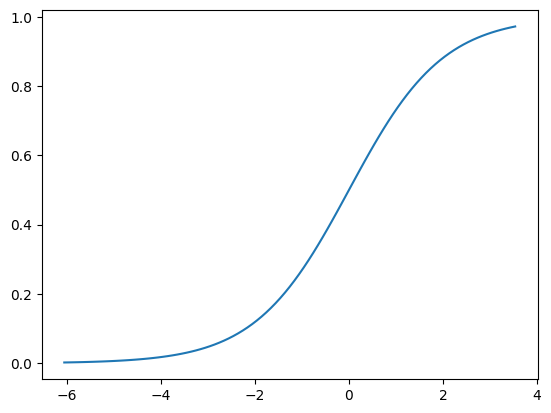

In [98]:
### 시그모이드 시각화 하기

### y축 : z 값의 최소부터 최대까지의 범위 값 산정하기
z = np.arange(decisions.min(), decisions.max(), 0.1)
z.shape

### 시그모이드 계산공식에 z값 적용하기
phi = 1 / (1 + np.exp(-z))
phi.shape

plt.plot(z, phi)
plt.show()


In [99]:
### 시그모이드 함수를 사용해서 5개 데이터의 확률값 확인하기
from scipy.special import expit

### 확률 확인하기
expit(decisions)

array([0.00240145, 0.97264817, 0.00513928, 0.01415798, 0.00232731])

In [100]:
lr.predict_proba(train_bream_smelt[ : 5])

array([[0.99759855, 0.00240145],
       [0.02735183, 0.97264817],
       [0.99486072, 0.00513928],
       [0.98584202, 0.01415798],
       [0.99767269, 0.00232731]])